#Machine Learning
`Autor: Erwing FC 
~erwingforerocastro@gmail.com`

#Datasets

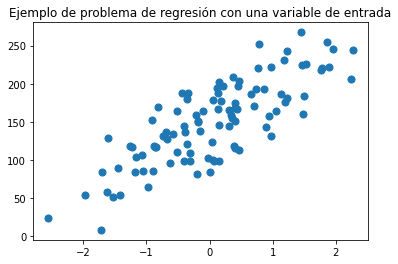

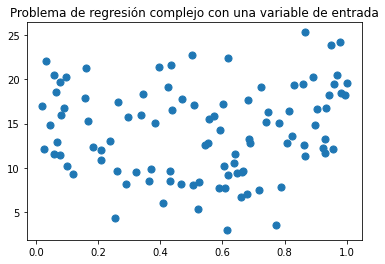

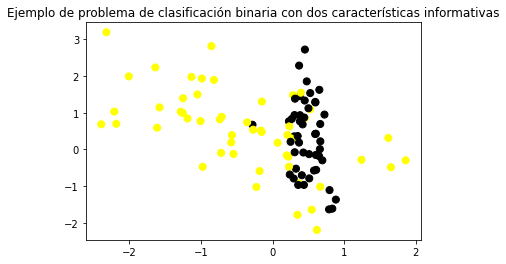

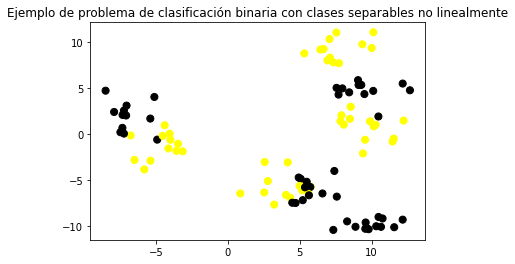

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset #subimos el archivo adspy_shared_utilities.py y CommViolPredUnnormalizedData.txt a coolab o jupyter

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# conjunto de datos de frutas
fruits = pd.read_csv('fruit_data_with_colors.csv') #subimos el archivo 

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']


# conjunto de datos sintéticos para regresión simple
from sklearn.datasets import make_regression
plt.figure(facecolor='w')
plt.title('Ejemplo de problema de regresión con una variable de entrada')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# conjunto de datos sintéticos para una regresión más compleja
from sklearn.datasets import make_friedman1
plt.figure(facecolor='w')
plt.title('Problema de regresión complejo con una variable de entrada')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# conjunto de datos sintéticos para clasificación (binario)
plt.figure(facecolor='w')
plt.title('Ejemplo de problema de clasificación binaria con dos características informativas')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# conjunto de datos sintéticos más difíciles para la clasificación (binario)
# con clases que no son linealmente separables
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure(facecolor='w')
plt.title('Ejemplo de problema de clasificación binaria con clases separables no linealmente')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# Conjunto de datos de cáncer de mama para clasificación
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Conjunto de datos de comunidades y delincuencia
(X_crime, y_crime) = load_crime_dataset()

###Clasificador Naive Bayes

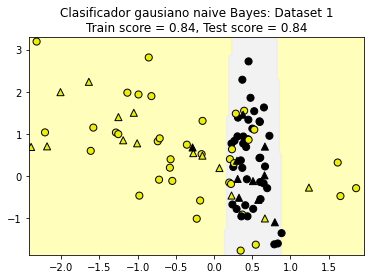

In [ ]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)

plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Clasificador gausiano naive Bayes: Dataset 1')

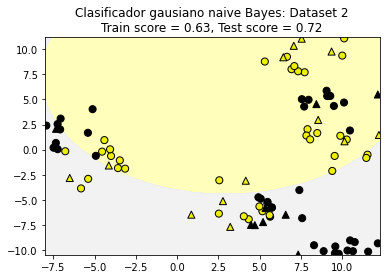

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)

plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Clasificador gausiano naive Bayes: Dataset 2')

######Aplicación a un ejemplo real

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Conjunto de datos de cancer de mama')
print('Precisión de GaussianNB Clasificador en el grupo de entrenamiento: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Precisión de GaussianNB Clasificador en el grupo de test: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Conjunto de datos de cancer de mama
Exactitud de GaussianNB Clasificador en el grupo de entrenamiento: 0.95
Exactitud de GaussianNB Clasificador en el grupo de test: 0.94


###Conjuntos de árboles de decisión

######Bosques al azar - Random forest

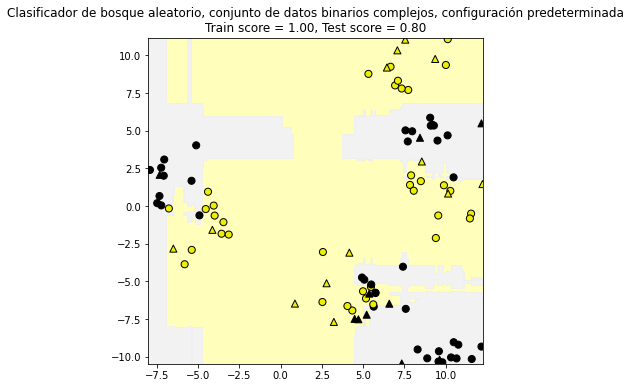

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Clasificador de bosque aleatorio, conjunto de datos binarios complejos, configuración predeterminada'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

######Bosques aleatorios - Random forest: Fruit dataset

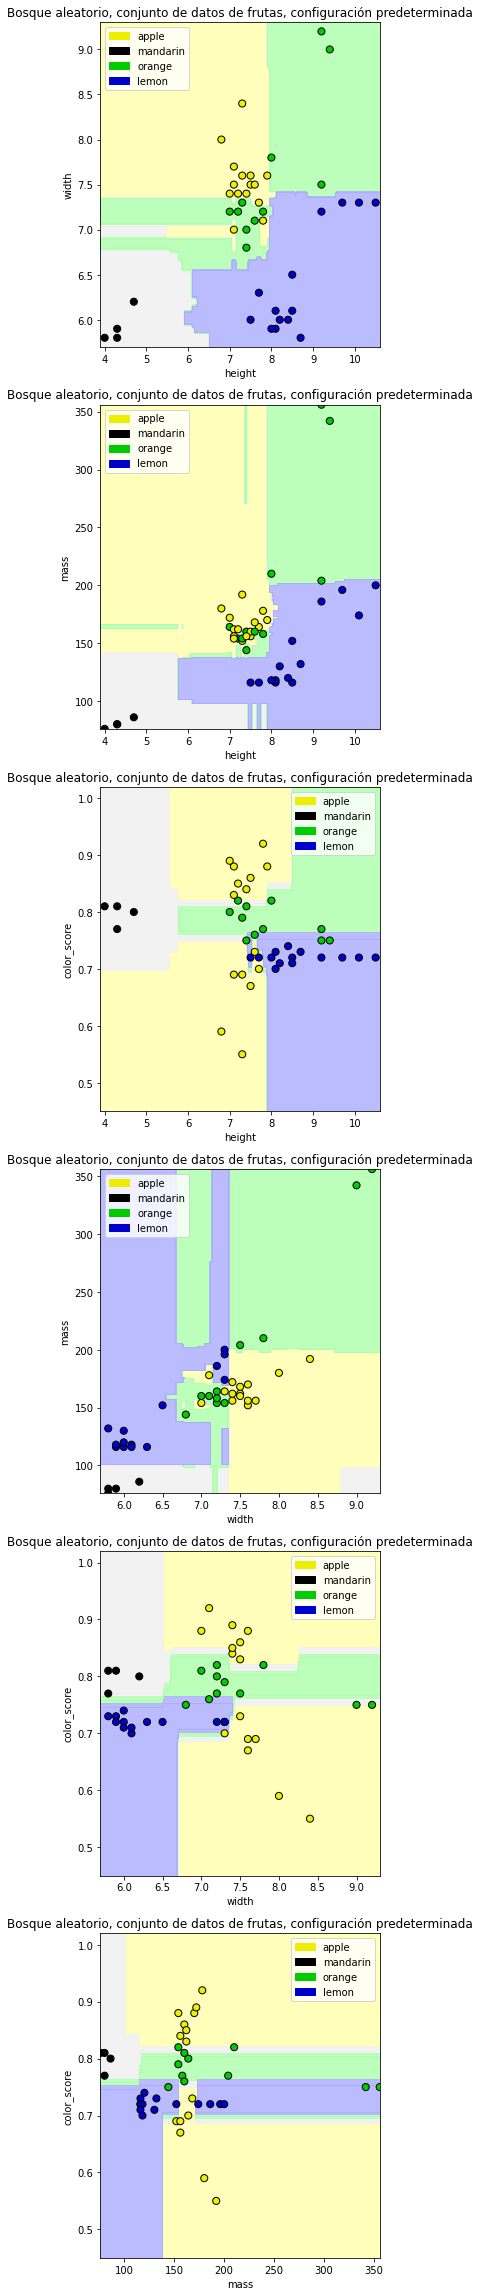

Bosque aleatorio, conjunto de datos de frutas, configuración predeterminada
Precisión del clasificador de RF en el conjunto de entrenamiento: 1.00
Precisión del clasificador de RF en el conjunto de prueba: 0.80


array([[  7.2 ,   7.2 , 154.  ,   0.82],
       [ 10.1 ,   7.3 , 174.  ,   0.72],
       [  4.  ,   5.8 ,  76.  ,   0.81],
       [  7.3 ,   7.6 , 152.  ,   0.69],
       [  7.  ,   7.2 , 164.  ,   0.8 ],
       [  8.7 ,   5.8 , 132.  ,   0.73],
       [  7.4 ,   7.  , 160.  ,   0.81],
       [  7.3 ,   7.3 , 154.  ,   0.79],
       [  8.1 ,   5.9 , 116.  ,   0.73],
       [  7.1 ,   7.5 , 162.  ,   0.83],
       [  7.7 ,   6.3 , 116.  ,   0.72],
       [  9.2 ,   7.5 , 204.  ,   0.77],
       [  7.1 ,   7.7 , 156.  ,   0.69],
       [  4.3 ,   5.8 ,  80.  ,   0.77],
       [  8.  ,   7.8 , 210.  ,   0.82],
       [  7.5 ,   7.6 , 156.  ,   0.67],
       [  8.2 ,   6.  , 130.  ,   0.71],
       [  7.5 ,   7.5 , 160.  ,   0.86],
       [  7.5 ,   6.  , 116.  ,   0.72],
       [  7.8 ,   7.1 , 178.  ,   0.92],
       [  7.7 ,   7.3 , 164.  ,   0.7 ],
       [  9.2 ,   9.2 , 356.  ,   0.75],
       [  7.6 ,   7.5 , 168.  ,   0.73],
       [  8.1 ,   6.1 , 118.  ,   0.7 ],
       [  8.5 , 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_fruits.to_numpy(),
                                                   y_fruits.to_numpy(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Bosque aleatorio, conjunto de datos de frutas, configuración predeterminada'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
#     altura-peso altura-masa altura-color ancho-masa.... etc
for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)
print('Bosque aleatorio, conjunto de datos de frutas, configuración predeterminada')
print('Precisión del clasificador de RF en el conjunto de entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Precisión del clasificador de RF en el conjunto de prueba: {:.2f}'
     .format(clf.score(X_test, y_test)))

######Bosques aleatorios en un conjunto de datos real - random forest in real dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Conjunto de datos sobre el cáncer de mama')
print('Precisión del clasificador de RF en el conjunto de entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Precisión del clasificador de RF en el conjunto de prueba: {:.2f}'
     .format(clf.score(X_test, y_test)))

Conjunto de datos sobre el cáncer de mama
Precisión del clasificador de RF en el conjunto de entrenamiento: 1.00
Precisión del clasificador de RF en el conjunto de prueba: 0.97


###Árboles de decisión impulsados por gradientes - Gradient-boosted decision trees

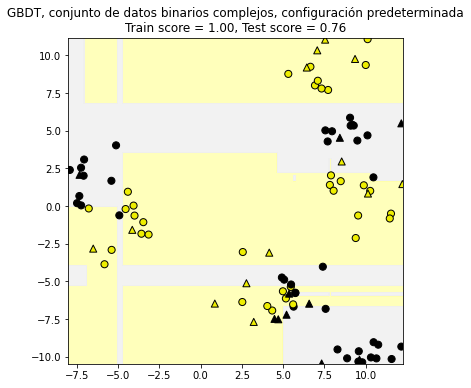

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, conjunto de datos binarios complejos, configuración predeterminada'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

######ADIG en el conjunto de frutas - GBDT on the fruit Dataset

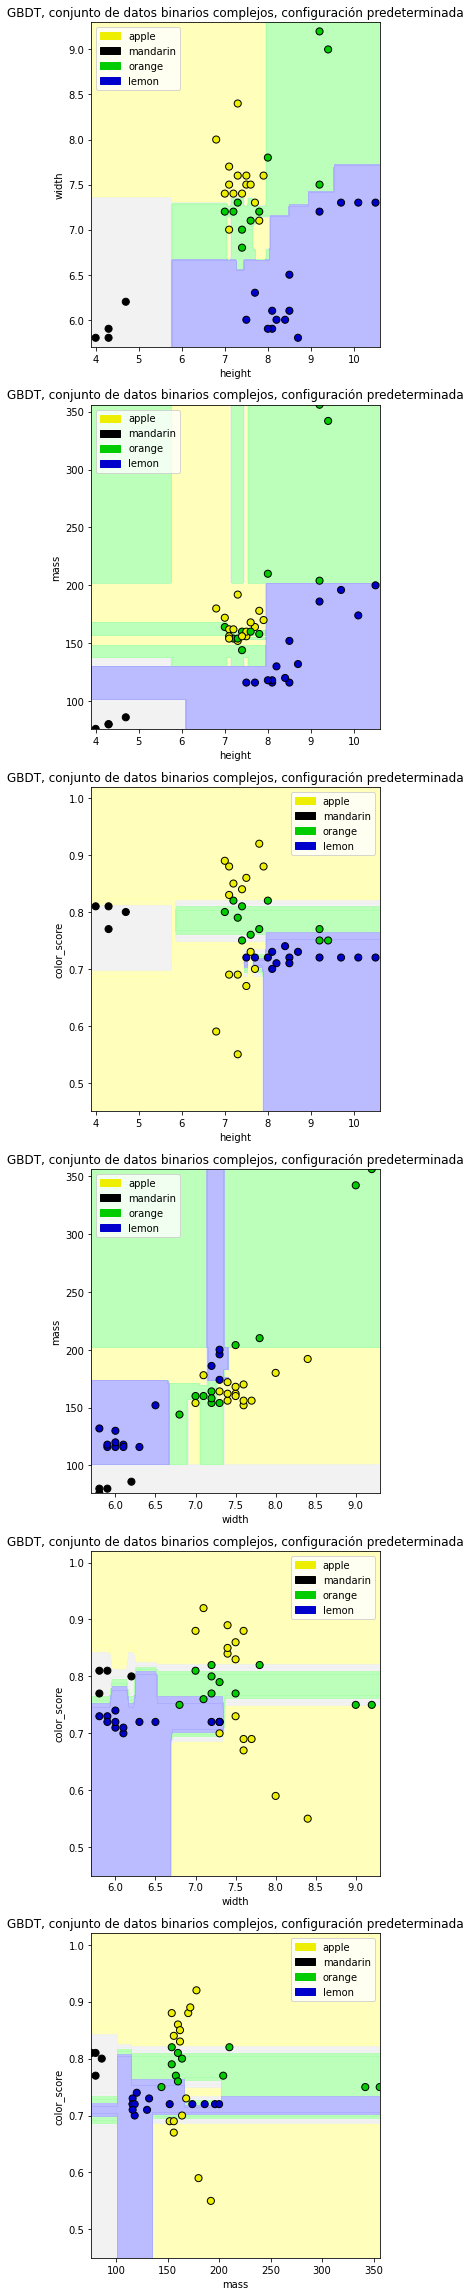

Conjunto de datos frutas
Precisión del clasificador de RF en el conjunto de entrenamiento: 1.00
Precisión del clasificador de RF en el conjunto de prueba: 0.80


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.to_numpy(),
                                                   y_fruits.to_numpy(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('Conjunto de datos frutas')
print('Precisión del clasificador de RF en el conjunto de entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Precisión del clasificador de RF en el conjunto de prueba: {:.2f}'
     .format(clf.score(X_test, y_test)))

######ADIG en el conjunto real - GBDT on a real-world dataset

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Conjunto de datos de cancer de mama (learning_rate=0.1, max_depth=3)')
print('Precisión del clasificador de RF en el conjunto de entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Precisión del clasificador de RF en el conjunto de prueba: {:.2f}'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Conjunto de datos de cancer de mama (learning_rate=0.01, max_depth=2)')
print('Precisión del clasificador de RF en el conjunto de entrenamiento: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Precisión del clasificador de RF en el conjunto de prueba: {:.2f}'
     .format(clf.score(X_test, y_test)))

Conjunto de datos de cancer de mama (learning_rate=0.1, max_depth=3)
Precisión del clasificador de RF en el conjunto de entrenamiento: 1.00
Precisión del clasificador de RF en el conjunto de prueba: 0.97
Conjunto de datos de cancer de mama (learning_rate=0.01, max_depth=2)
Precisión del clasificador de RF en el conjunto de entrenamiento: 0.97
Precisión del clasificador de RF en el conjunto de prueba: 0.97
